In [1]:
# DESCOBERTA DE CONHECIMENTO EM BANCOS DE DADOS E MINERAÇÃO DE DADOS
# Este é um exemplo bem simples de uma REDE NEURAL para reconhecimento de dígitos.
# Problema de classificação
# DATASET: 64 campos que formam a imagem de 1 dígito, ou seja, um número de 0 a 9.
# O objetivo será classificar cada imagem em um das 10 classes: 0 até 9.

from sklearn import datasets

In [2]:
d = datasets.load_digits()

In [3]:
print(d.keys())

['images', 'data', 'target_names', 'DESCR', 'target']


In [4]:
print(d['DESCR']) # Informações sobre o DATASET


Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
print(d['data'][1]) # Primeira imagem. Exemplo de algumas imagens do DATASET.

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [6]:
import matplotlib.pyplot as plot #Plotando a imagem do DATASET da posição acima. 

In [8]:
d.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

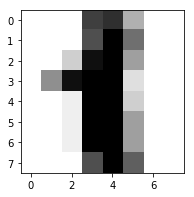

In [7]:
plot.figure(1, figsize=(3, 3))
plot.imshow(d.images[1], cmap=plot.cm.gray_r, interpolation='nearest')
plot.show()

In [8]:
import math

In [9]:
dados = d['data']
print(len(dados)) # Número de instâncias

1797


In [10]:
idx_treinamento = math.floor(len(dados)*0.7)

In [11]:
print (idx_treinamento) # Separando 70% dos dados para treinamento


1257


In [12]:
cjtreinamento = dados [:idx_treinamento] # Slice do array da posição 0 até 1257

In [13]:
idx_teste = len(dados) - idx_treinamento # Separando 30% para testes

In [14]:
print (idx_teste) 

540


In [15]:
cjteste = dados [idx_treinamento:]  #Slice do array da posição 1257 até final do array

In [16]:
print (idx_treinamento + idx_teste) # total

1797


In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
# usei a função de ativação logistic (sigmoid function) e taxa de aprendizado = 0.1

c = MLPClassifier(activation='logistic', learning_rate_init=0.1, verbose=True)

In [19]:
print(cjtreinamento)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   0. ...,   3.   0.   0.]
 [  0.   0.   5. ...,  11.   3.   0.]
 [  0.   0.   3. ...,   0.   0.   0.]]


In [20]:
print (d['target'])
len(d['target'])

[0 1 2 ..., 8 9 8]


1797

In [21]:
rotulos = d['target']
rotulos_treinamento = rotulos[:idx_treinamento] # Slice dos rotulos da posição 0 até 1257
len(rotulos_treinamento)

1257

In [22]:
# Treinando ...
c.fit(cjtreinamento,rotulos_treinamento)

Iteration 1, loss = 3.24530492
Iteration 2, loss = 1.71752405
Iteration 3, loss = 0.78918341
Iteration 4, loss = 0.55784299
Iteration 5, loss = 0.38545551
Iteration 6, loss = 0.37805384
Iteration 7, loss = 0.35157580
Iteration 8, loss = 0.29397945
Iteration 9, loss = 0.25078040
Iteration 10, loss = 0.25247639
Iteration 11, loss = 0.18218719
Iteration 12, loss = 0.15099093
Iteration 13, loss = 0.16091516
Iteration 14, loss = 0.16631149
Iteration 15, loss = 0.27205472
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [23]:
# Com a rede treinada, hora de testar!!
resultado = c.predict(cjteste)

In [25]:
rotulos_teste = rotulos[idx_treinamento:] # Slice dos rotulos da posição 1257 até o final do array

acuracia = c.score(cjteste, rotulos_teste) # Medindo a perfomance: a acurácia foi:
print ('Acurária',acuracia)

Acurária 0.814814814815


In [26]:
# Alterando alguns parâmetros para melhorar a acurácia. Apenas alterei o default do ajustes de pessos para 
# sgd (stochastic gradient descent) e alterei a taxa de aprendizado

c = MLPClassifier(solver='sgd',activation='logistic', learning_rate_init=0.12, verbose=True)

In [27]:
c.fit(cjtreinamento,rotulos_treinamento)
resultado = c.predict(cjteste)
acuracia = c.score(cjteste, rotulos_teste)
print ('Acurária',acuracia)

Iteration 1, loss = 1.92301152
Iteration 2, loss = 0.75281369
Iteration 3, loss = 0.31167586
Iteration 4, loss = 0.15538100
Iteration 5, loss = 0.10461524
Iteration 6, loss = 0.07017166
Iteration 7, loss = 0.05513287
Iteration 8, loss = 0.04571609
Iteration 9, loss = 0.03797095
Iteration 10, loss = 0.03531565
Iteration 11, loss = 0.02957703
Iteration 12, loss = 0.02584254
Iteration 13, loss = 0.02286624
Iteration 14, loss = 0.02063556
Iteration 15, loss = 0.01894501
Iteration 16, loss = 0.01765469
Iteration 17, loss = 0.01673629
Iteration 18, loss = 0.01553654
Iteration 19, loss = 0.01476381
Iteration 20, loss = 0.01374823
Iteration 21, loss = 0.01285972
Iteration 22, loss = 0.01233291
Iteration 23, loss = 0.01183230
Iteration 24, loss = 0.01124897
Iteration 25, loss = 0.01101129
Iteration 26, loss = 0.01024851
Iteration 27, loss = 0.00977657
Iteration 28, loss = 0.00951503
Iteration 29, loss = 0.00905553
Iteration 30, loss = 0.00880868
Iteration 31, loss = 0.00842409
Iteration 32, los